### Required Assignment 5.1: Will the Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaurant near where you are driving. Would you accept that coupon and take a short detour to the restaurant? Would you accept the coupon but use it on a subsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaurant? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\$20 - $50).

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece.





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [2]:
data = pd.read_csv('/content/drive/My Drive/Colab Notebooks/data/coupons.csv')

In [3]:
data.rename(columns={'passanger': 'passenger'}, inplace=True)
data.head()

,destination,passenger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

In [5]:
columns_with_nulls = data.columns[data.isna().any()]
print("Columns with any NaN values:", list(columns_with_nulls))

Columns with any NaN values: ['car', 'Bar', 'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50']


In [ ]:
from pandas.api.types import CategoricalDtype

# Making important columns more human readable

print(data['coupon'].unique())
coupon_map = {
    'Restaurant(<20)'         : 'lowEnd',
    'Coffee House'            : 'coffeeHouse',
    'Carry out & Take away'   : 'toGo',
    'Bar'                     : 'bar',
    'Restaurant(20-50)'       : 'highEnd'
}
data['coupon_readable'] = data['coupon'].map(coupon_map)
coupon_order = CategoricalDtype(categories=['lowEnd', 'coffeeHouse', 'toGo', 'bar', 'highEnd'], ordered=True)
data['coupon_readable'] = data['coupon_readable'].astype(coupon_order)

income_ordered_map = {
    'Less than $12500': '1. < $12.5k',
    '$12500 - $24999': '2. $12.5k–25k',
    '$25000 - $37499': '3. $25k–37.5k',
    '$37500 - $49999': '4. $37.5k–50k',
    '$50000 - $62499': '5. $50k–62.5k',
    '$62500 - $74999': '6. $62.5k–75k',
    '$75000 - $87499': '7. $75k–87.5k',
    '$87500 - $99999': '8. $87.5k–100k',
    '$100000 or More': '9. $100k+'
}
data['income_readable'] = data['income'].map(income_ordered_map)
income_order = CategoricalDtype(categories=['1. < $12.5k', '2. $12.5k–25k', '3. $25k–37.5k', '4. $37.5k–50k', '5. $50k–62.5k', '6. $62.5k–75k', '7. $75k–87.5k', '8. $87.5k–100k', '9. $100k+'], ordered=True)
data['income_readable'] = data['income_readable'].astype(income_order)

age_map = {
    'below21' : '<21',
    '21' : '21-25',
    '26' : '26-30',
    '31' : '31-35',
    '36' : '36-40',
    '41' : '41-45',
    '46' : '46-50',
    '50plus' : '>50',
}
data['age_readable'] = data['age'].map(age_map)
age_order = CategoricalDtype(categories=['< 21', '21-25', '26-30', '31-35', '36-40', '41-45', '46-50', '>50'], ordered=True)
data['age_readable'] = data['age_readable'].astype(age_order)
data.head()



['Restaurant(<20)' 'Coffee House' 'Carry out & Take away' 'Bar'
 'Restaurant(20-50)']


,destination,passenger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y,coupon_readable,income_readable,age_readable
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,1~3,1,0,0,0,1,1,lowEnd,4. $37.5k–50k,21-25
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,1~3,1,0,0,0,1,0,coffeeHouse,4. $37.5k–50k,21-25
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,1~3,1,1,0,0,1,1,toGo,4. $37.5k–50k,21-25
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,1~3,1,1,0,0,1,0,coffeeHouse,4. $37.5k–50k,21-25
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,1~3,1,1,0,0,1,0,coffeeHouse,4. $37.5k–50k,21-25


3. Decide what to do about your missing data -- drop, replace, other...

In [ ]:
bar_coupons = data[data['coupon_readable'] == 'bar']
print(bar_coupons['Y'].isna().sum())
print(bar_coupons['Y'].value_counts(dropna=False))

0
Y
0    1190
1     827
Name: count, dtype: int64


4. What proportion of the total observations chose to accept the coupon?



In [ ]:
acceptance_rate = data['Y'].mean()
print(f"Proportion of users who accepted the coupon: {acceptance_rate:.2%}")

Proportion of users who accepted the coupon: 56.84%


5. Use a bar plot to visualize the `coupon` column.

/tmp/ipython-input-73-2129824422.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_acceptance = data.groupby('age_readable')['Y'].mean().reset_index()
/tmp/ipython-input-73-2129824422.py:43: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  income_acceptance = data.groupby('income_readable')['Y'].mean().reset_index()


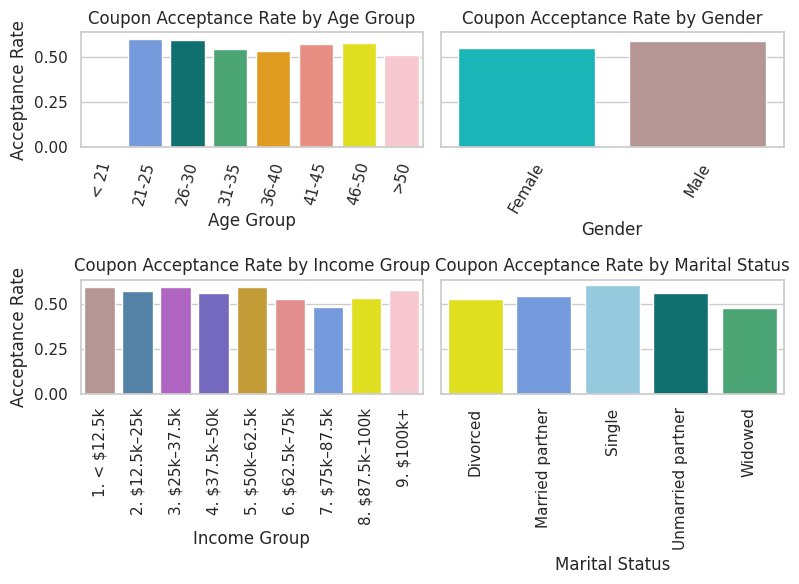

In [ ]:
sns.set(style="whitegrid")

# Lets plot User attribute analysis
# Lets try and plot all in same figure

# Maybe a 2X2 figure matrix

fig, axes = plt.subplots(2, 2, figsize=(8, 6), sharey=True)

# 1,1
custom_palette = { '< 21' : 'skyblue', '21-25' : 'cornflowerblue', '26-30' : 'teal', '31-35': 'mediumseagreen', '36-40' : 'orange', '41-45': 'salmon', '46-50': 'yellow', '>50': 'pink'}
age_acceptance = data.groupby('age_readable')['Y'].mean().reset_index()
sns.barplot(
    data=age_acceptance,
    x='age_readable',
    y='Y',
    hue='age_readable',
    palette=custom_palette,
    ax=axes[0,0])
axes[0,0].set_title('Coupon Acceptance Rate by Age Group', fontsize=12)
axes[0,0].set_xlabel('Age Group', fontsize=12)
axes[0,0].set_ylabel('Acceptance Rate', fontsize=12)
axes[0,0].tick_params(axis='x', rotation=75)

# 1, 2
custom_palette = { 'Male' : 'rosybrown', 'Female': 'darkturquoise'}
gender_acceptance = data.groupby('gender')['Y'].mean().reset_index()
sns.barplot(
    data=gender_acceptance,
    x='gender',
    y='Y',
    hue='gender',
    palette=custom_palette,
    ax=axes[0,1])
axes[0,1].set_title('Coupon Acceptance Rate by Gender', fontsize=12)
axes[0,1].set_xlabel('Gender', fontsize=12)
axes[0,1].set_ylabel('Acceptance Rate', fontsize=12)
axes[0,1].tick_params(axis='x', rotation=60)


# 2, 1
custom_palette = { '1. < $12.5k': 'rosybrown', '2. $12.5k–25k': 'steelblue', '3. $25k–37.5k': 'mediumorchid', '4. $37.5k–50k': 'slateblue', '5. $50k–62.5k': 'goldenrod', '6. $62.5k–75k': 'lightcoral', '7. $75k–87.5k': 'cornflowerblue', '8. $87.5k–100k': 'yellow', '9. $100k+': 'pink'}
income_acceptance = data.groupby('income_readable')['Y'].mean().reset_index()
sns.barplot(
    data=income_acceptance,
    x='income_readable',
    y='Y',
    hue='income_readable',
    palette=custom_palette,
    ax=axes[1,0])
axes[1,0].set_title('Coupon Acceptance Rate by Income Group', fontsize=12)
axes[1,0].set_xlabel('Income Group', fontsize=12)
axes[1,0].set_ylabel('Acceptance Rate', fontsize=12)
axes[1,0].tick_params(axis='x', rotation=90)


# 2, 2
custom_palette = { 'Single' : 'skyblue', 'Married partner' : 'cornflowerblue', 'Unmarried partner' : 'teal', 'Widowed': 'mediumseagreen', 'Divorced': 'yellow'}
marital_status_acceptance = data.groupby('maritalStatus')['Y'].mean().reset_index()
sns.barplot(
    data=marital_status_acceptance,
    x='maritalStatus',
    y='Y',
    hue='maritalStatus',
    palette=custom_palette,
    ax=axes[1,1])
axes[1,1].set_title('Coupon Acceptance Rate by Marital Status', fontsize=12)
axes[1,1].set_xlabel('Marital Status', fontsize=12)
axes[1,1].set_ylabel('Acceptance Rate', fontsize=12)
axes[1,1].tick_params(axis='x', rotation=90)


plt.tight_layout()
plt.savefig('/content/drive/My Drive/Colab Notebooks/images/user_attributes.png', dpi=600)
plt.show()



6. Use a histogram to visualize the temperature column.

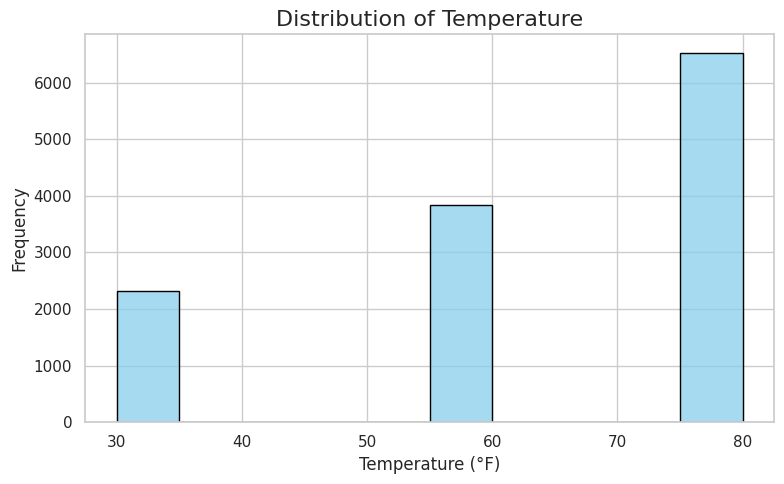

In [ ]:
plt.figure(figsize=(8, 5))
sns.histplot(data['temperature'], bins=10, kde=False, color='skyblue', edgecolor='black')

plt.title('Distribution of Temperature', fontsize=16)
plt.xlabel('Temperature (°F)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.tight_layout()
plt.show()


**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [ ]:
bar_coupons = data[data['coupon'] == 'bar']

2. What proportion of bar coupons were accepted?


In [ ]:
bar_acceptance_rate = bar_coupons['Y'].mean()
print(f"Proportion of bar coupons accepted: {bar_acceptance_rate:.2%}")

Proportion of bar coupons accepted: 41.00%


3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [ ]:
low_freq = ['never', 'less1', '1~3']
high_freq = ['4~8', 'gt8']

low_visitors = bar_coupons[bar_coupons['Bar'].isin(low_freq)]
high_visitors = bar_coupons[bar_coupons['Bar'].isin(high_freq)]

low_acceptance = low_visitors['Y'].mean()
high_acceptance = high_visitors['Y'].mean()

# Print results
print(f"Acceptance rate (≤3 bar visits/month): {low_acceptance:.2%}")
print(f"Acceptance rate (>3 bar visits/month): {high_acceptance:.2%}")


Acceptance rate (≤3 bar visits/month): 37.06%
Acceptance rate (>3 bar visits/month): 76.88%


4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [ ]:
bar_more_than_once = ['1~3', '4~8', 'gt8']

age_over_25 = ['26-30', '31-35', '36-40', '41-45', '46-50', '>50']

condition_group = (bar_coupons['Bar'].isin(bar_more_than_once)) & (bar_coupons['age_readable'].isin(age_over_25))
other_group = ~condition_group

group1 = bar_coupons[condition_group]
group2 = bar_coupons[other_group]

group1_accept = group1['Y'].mean()
group2_accept = group2['Y'].mean()

# Print results
print(f"Acceptance rate (bar >1/month AND age >25): {group1_accept:.2%}")
print(f"Acceptance rate (everyone else): {group2_accept:.2%}")


Acceptance rate (bar >1/month AND age >25): 69.52%
Acceptance rate (everyone else): 33.50%


5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.


In [ ]:
bar_more_than_once = ['1~3', '4~8', 'gt8']
excluded_passenger = 'Kid(s)'
excluded_occupations = ['Farming & Fishing', 'Farming Fishing & Forestry']

condition_group = (
    (bar_coupons['Bar'].isin(bar_more_than_once)) &
    (bar_coupons['passenger'] != excluded_passenger) &
    (~bar_coupons['occupation'].isin(excluded_occupations))
)

group1 = bar_coupons[condition_group]
group2 = bar_coupons[~condition_group]

group1_accept = group1['Y'].mean()
group2_accept = group2['Y'].mean()

print(f"Acceptance rate (bar >1/month, no kids, not farming jobs): {group1_accept:.2%}")
print(f"Acceptance rate (everyone else): {group2_accept:.2%}")


Acceptance rate (bar >1/month, no kids, not farming jobs): 71.32%
Acceptance rate (everyone else): 29.60%


6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K.



In [ ]:
bar_more_than_once = ['1~3', '4~8', 'gt8']
cheap_restaurant_high = ['4~8', 'gt8']
low_income = ['1. < $12.5k', '2. $12.5k–25k', '3. $25k–37.5k', '4. $37.5k–50k']
under_30 = ['< 21', '21-25', '26-30']

cond1 = (
    (bar_coupons['Bar'].isin(bar_more_than_once)) &
    (bar_coupons['passenger'] != 'Kid(s)') &
    (bar_coupons['maritalStatus'] != 'Widowed')
)

cond2 = (
    (bar_coupons['Bar'].isin(bar_more_than_once)) &
    (bar_coupons['age_readable'].isin(under_30))
)

cond3 = (
    (bar_coupons['RestaurantLessThan20'].isin(cheap_restaurant_high)) &
    (bar_coupons['income_readable'].isin(low_income))
)

target_group_mask = cond1 | cond2 | cond3

group1 = bar_coupons[target_group_mask]
group2 = bar_coupons[~target_group_mask]

group1_accept = group1['Y'].mean()
group2_accept = group2['Y'].mean()

# Print results
print(f"Acceptance rate (target group): {group1_accept:.2%}")
print(f"Acceptance rate (others): {group2_accept:.2%}")


Acceptance rate (target group): 58.89%
Acceptance rate (others): 29.81%


7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

In [ ]:
Drivers - going to bars frequently, and not traveling with children, and not being in  rural or fishing occupations — are significantly more likely to accept bar coupons.



### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

In [ ]:
# Which passengers (alone, partner, kids, friends) are most associated with accepting a coffee house coupon?

coffee_coupons = data[data['coupon_readable'] == 'coffeeHouse']


           total  accepted  acceptance_rate
passenger                                  
Friend(s)   1228       733         0.596906
Partner      305       174         0.570492
Kid(s)       207       100         0.483092
Alone       2256       988         0.437943


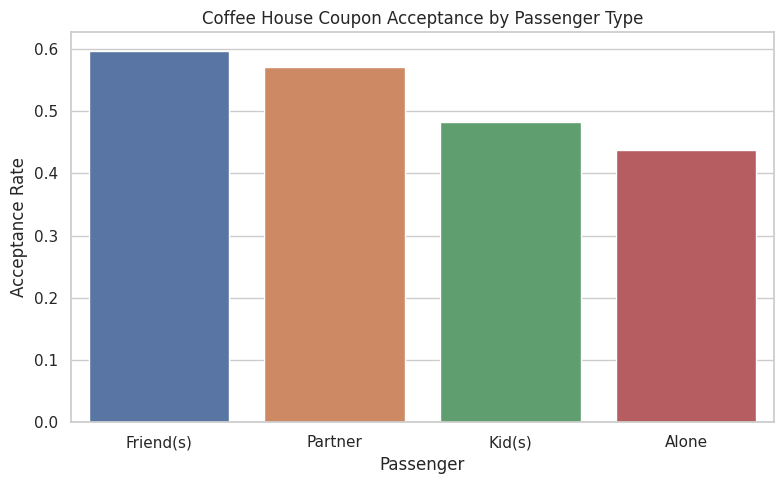

In [ ]:

passenger_acceptance = (
    coffee_coupons
    .groupby('passenger')['Y']
    .agg(['count', 'sum', 'mean'])
    .rename(columns={'mean': 'acceptance_rate', 'count': 'total', 'sum': 'accepted'})
    .sort_values('acceptance_rate', ascending=False)
)

print(passenger_acceptance)

passenger_acceptance_plot = passenger_acceptance.reset_index()

plt.figure(figsize=(8, 5))
sns.barplot(data=passenger_acceptance_plot, x='passenger', y='acceptance_rate', hue= 'passenger')
plt.title('Coffee House Coupon Acceptance by Passenger Type')
plt.ylabel('Acceptance Rate')
plt.xlabel('Passenger')
plt.tight_layout()
plt.savefig('/content/drive/My Drive/Colab Notebooks/images/passenger_acceptance.png', dpi=600)
plt.show()


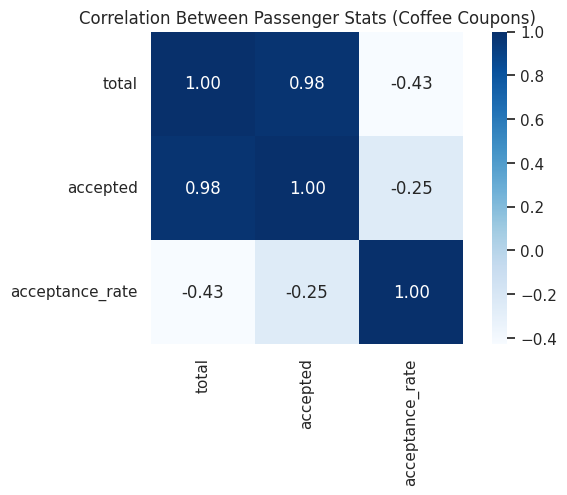

In [ ]:
corr_df = passenger_acceptance[['total', 'accepted', 'acceptance_rate']]

# Compute correlation matrix
corr_matrix = corr_df.corr()

# Plot heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(corr_matrix, annot=True, cmap='Blues', fmt='.2f', square=True)
plt.title('Correlation Between Passenger Stats (Coffee Coupons)', fontsize=12)
plt.tight_layout()
plt.tick_params(axis='x', rotation=90)
plt.tick_params(axis='y', rotation=0)
plt.savefig('/content/drive/My Drive/Colab Notebooks/images/passenger_correlation.png', dpi=600)
plt.show()


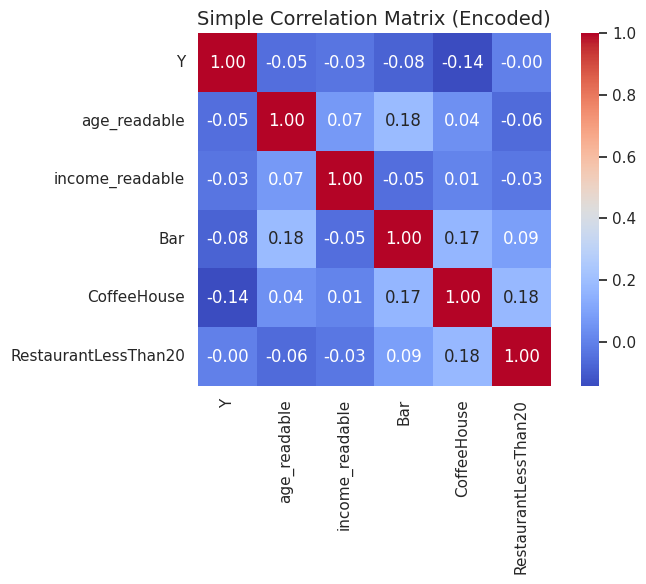

In [ ]:
from sklearn.preprocessing import OrdinalEncoder
features = ['Y', 'age_readable', 'income_readable', 'Bar', 'CoffeeHouse', 'RestaurantLessThan20']

corr_data = data[features].dropna()  # Drop rows with missing values

# Encode categorical columns with order preserved
encoder = OrdinalEncoder()
corr_data_encoded = pd.DataFrame(encoder.fit_transform(corr_data), columns=features)

corr_matrix = corr_data_encoded.corr()
#corr_matrix = corr_data.corr()


# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title("Simple Correlation Matrix (Encoded)", fontsize=14)
plt.tight_layout()
plt.savefig('/content/drive/My Drive/Colab Notebooks/images/correlation_matrix.png', dpi=600)
plt.show()
